Nama: Muhammad Rizky

In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
import nltk, os, re, string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, BatchNormalization, Bidirectional
from keras.models import Model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import nltk, os, re, string
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
pip freeze > requirements.txt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/reviews.csv')
data.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,214d0009-88cf-4f75-a097-e53b066a109d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aku pertama kali gunain aplikasi tokocrypto in...,5,24,2.11.1,2024-07-21 13:13:40,NaN,NaN,2.11.1
1,80438ad8-e645-4192-90a9-a5543501a5ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ini emng gampang bnget dipake untuk p...,5,11,2.11.1,2024-07-21 14:45:00,NaN,NaN,2.11.1
2,b053e01b-139c-4f29-bf2e-8ae5961e94e5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat simple,gampang dipake pemul...",5,2,2.11.1,2024-07-18 07:19:47,NaN,NaN,2.11.1
3,4cf181d1-834f-44cf-b020-579ebf98f409,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi yg nyaman banget buat pemula, gampang...",5,0,2.11.1,2024-07-21 12:04:08,NaN,NaN,2.11.1
4,3b1db6c5-660b-408d-af5b-690e8ec40d44,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi nya bener bener mudah banget digunaka...,5,0,2.11.1,2024-07-23 01:34:58,NaN,NaN,2.11.1
5,c9931525-3505-4034-b412-fe5f52014473,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi recommend banget dan pilihan ikonnya ...,5,0,2.11.1,2024-07-24 08:52:47,NaN,NaN,2.11.1
6,861bb59f-9814-4c15-810d-875e7a0577e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Secara tampilan versi terbaru ini sudah bagus,...",5,2,2.11.0,2024-07-12 11:52:04,NaN,NaN,2.11.0
7,f3cfae20-4f7b-4ab7-bfb5-5f3bc42e0eb7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Rekomendasi bangett karna aplikasi trandingnya...,5,0,2.11.1,2024-07-18 13:14:54,NaN,NaN,2.11.1
8,3f1650c0-3edf-4b1b-8b64-f899a0e5c4c9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya bagus dan rekomend banget untuk pe...,5,2,2.11.1,2024-07-23 08:11:24,NaN,NaN,2.11.1
9,0cb9cba5-5246-46f2-a5b6-7d1a45eef2b0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kemarin dapat rekomendasi dari temen aplikasi ...,5,0,2.11.1,2024-07-24 10:04:58,NaN,NaN,2.11.1


In [ ]:
files.download('/content/drive/My Drive/Colab Notebooks/reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29579 entries, 0 to 29578
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              29579 non-null  object
 1   userName              29579 non-null  object
 2   userImage             29579 non-null  object
 3   content               29579 non-null  object
 4   score                 29579 non-null  int64 
 5   thumbsUpCount         29579 non-null  int64 
 6   reviewCreatedVersion  22251 non-null  object
 7   at                    29579 non-null  object
 8   replyContent          25922 non-null  object
 9   repliedAt             25922 non-null  object
 10  appVersion            22251 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


In [ ]:
data.dropna

<bound method DataFrame.dropna of                                                  content  score  \
0      aku pertama kali gunain aplikasi tokocrypto in...      5   
1      aplikasi ini emng gampang bnget dipake untuk p...      5   
2      aplikasinya sangat simplegampang dipake pemula...      5   
3      aplikasi yg nyaman banget buat pemula gampang ...      5   
4      aplikasi nya bener bener mudah banget digunaka...      5   
...                                                  ...    ...   
29574                                             mantab      5   
29575                                                 💩💩      1   
29576                                                  👎      1   
29577                                                  👍      1   
29578         👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎👎      1   

       label_negatif  label_netral  label_positif  label_negatif  \
0              False         False           True          False   
1              False         False           True          False   
2              False         False           True          False   
3              False         False           True          False   
4              False         False           True          False   
...              ...           ...            ...            ...   
29574          False         False           True          False   
29575           True         False          False           True   
29576           True         False          False           True   
29577           True         False          False           True   
29578           True         False          False           True   

       label_netral  label_positif  
0             False           True  
1             False           True  
2             False           True  
3             False           True  
4             False           True  
...             ...            ...  
29574         False           True  
29575         False          False  
29576         False          False  
29577         False          False  
29578         False          False  

[29579 rows x 8 columns]>

In [ ]:
data.drop_duplicates()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,214d0009-88cf-4f75-a097-e53b066a109d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aku pertama kali gunain aplikasi tokocrypto in...,5,24,2.11.1,2024-07-21 13:13:40,NaN,NaN,2.11.1
1,80438ad8-e645-4192-90a9-a5543501a5ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ini emng gampang bnget dipake untuk p...,5,11,2.11.1,2024-07-21 14:45:00,NaN,NaN,2.11.1
2,b053e01b-139c-4f29-bf2e-8ae5961e94e5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat simple,gampang dipake pemul...",5,2,2.11.1,2024-07-18 07:19:47,NaN,NaN,2.11.1
3,4cf181d1-834f-44cf-b020-579ebf98f409,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi yg nyaman banget buat pemula, gampang...",5,0,2.11.1,2024-07-21 12:04:08,NaN,NaN,2.11.1
4,3b1db6c5-660b-408d-af5b-690e8ec40d44,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi nya bener bener mudah banget digunaka...,5,0,2.11.1,2024-07-23 01:34:58,NaN,NaN,2.11.1
...,...,...,...,...,...,...,...,...,...,...,...
29574,e6565f3c-9cb0-4f00-a02b-3fd1b72c8b57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantab....,5,0,NaN,2021-05-12 20:55:00,"Terima kasih atas penilaiannya. Yuk, nikmati t...",2021-05-13 07:08:56,NaN
29575,7de672c8-9a0d-44d1-b888-3c730e903fab,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,💩💩,1,0,NaN,2022-03-16 14:35:33,"Hai, Terima kasih telah menggunakan Tokocrypto...",2022-03-16 14:37:59,NaN
29576,21990d98-81a3-4548-bbe3-52120ac4493a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👎,1,2,NaN,2022-11-28 10:20:50,"Hai, Terima kasih telah menggunakan Tokocrypto...",2022-11-28 10:23:30,NaN
29577,6495fbf5-87af-4601-a200-28c41a9b76e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍,1,0,NaN,2021-09-11 15:47:57,"Hai, terima kasih telah menggunakan Tokocrypto...",2021-09-11 18:40:35,NaN


In [ ]:
data = data[['content', 'score']]

In [ ]:
def preprocessing_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'\([^)]*\)', '', text)  # Menghapus teks dalam tanda kurung
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Menghapus tanda baca
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi ganda dan membersihkan
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

In [ ]:
data['content'] = data['content'].apply(preprocessing_text)

In [ ]:
data['label'] = data['score'].apply(lambda x: 'positif' if x > 3 else ('netral' if x == 3 else 'negatif'))
data = pd.get_dummies(data, columns=['label'])
data

,content,score,label_negatif,label_netral,label_positif
0,aku pertama kali gunain aplikasi tokocrypto in...,5,False,False,True
1,aplikasi ini emng gampang bnget dipake untuk p...,5,False,False,True
2,aplikasinya sangat simplegampang dipake pemula...,5,False,False,True
3,aplikasi yg nyaman banget buat pemula gampang ...,5,False,False,True
4,aplikasi nya bener bener mudah banget digunaka...,5,False,False,True
...,...,...,...,...,...
29574,mantab,5,False,False,True
29575,💩💩,1,True,False,False
29576,👎,1,True,False,False
29577,👍,1,True,False,False


In [ ]:
X = data['content'].values.tolist()
Y = data[['label_negatif', 'label_netral', 'label_positif']].values

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=200)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 27754


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=200),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(Y.shape[1], activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.92 and and logs.get('val_accuracy') > 0.9:
            print("\nAkurasi train dan validasi telah mencapai nilai > 92%!")
            self.model.stop_training = True

callbacks = myCallback()

SyntaxError: invalid syntax (<ipython-input-2-a30548218412>, line 3)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[callbacks])

Epoch 1/10
666/666 [==============================] - 653s 970ms/step - loss: 0.4118 - accuracy: 0.8488 - val_loss: 0.3198 - val_accuracy: 0.8885
Epoch 2/10
666/666 [==============================] - 631s 948ms/step - loss: 0.3060 - accuracy: 0.8918 - val_loss: 0.3179 - val_accuracy: 0.8914
Epoch 3/10
666/666 [==============================] - 645s 969ms/step - loss: 0.2667 - accuracy: 0.9012 - val_loss: 0.3511 - val_accuracy: 0.8876
Epoch 4/10
666/666 [==============================] - 642s 964ms/step - loss: 0.2383 - accuracy: 0.9104 - val_loss: 0.3608 - val_accuracy: 0.8830
Epoch 5/10
666/666 [==============================] - 631s 948ms/step - loss: 0.2200 - accuracy: 0.9157 - val_loss: 0.3800 - val_accuracy: 0.8821
Epoch 6/10
666/666 [==============================] - 645s 969ms/step - loss: 0.2055 - accuracy: 0.9195 - val_loss: 0.4022 - val_accuracy: 0.8783
Epoch 7/10
666/666 [==============================] - ETA: 0s - loss: 0.1892 - accuracy: 0.9282
Akurasi train dan validasi t

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

185/185 [==============================] - 33s 178ms/step - loss: 0.4490 - accuracy: 0.8602
Test Accuracy: 0.86


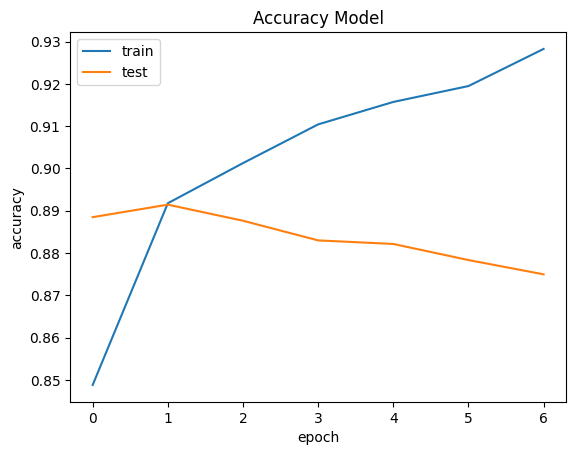

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc='upper left')

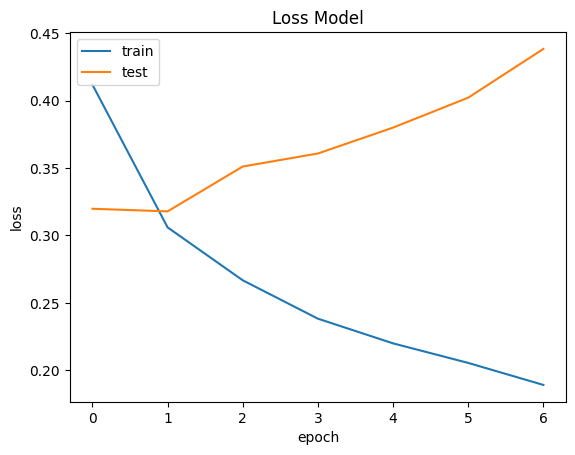

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')